# What is Sales Analysis

Sales analysis is mining your data to evaluate the performance of your sales team against its goals. It provides insights about the top performing and underperforming products/services, the problems in selling and market opportunities, sales forecasting, and sales activities that generate revenue.

Regular sales data analysis provides an understanding of the products that your customers are buying and helps you dissect why they are behaving in a certain way. You can also find patterns in your lead conversions and drop offs. All of these aspects enable you to optimize your sales process.

<img align="right" style="max-height:200px" src="https://www.winacc.com/wp-content/uploads/2018/09/Business-Benefits-of-the-Sales-Analysis-Report-Forming-a-Data-Backed-Marketing-Strategy-1080x600.jpg"/>

## Importance of Sales Analysis
<ul>
    <li>Make data-driven decisions instead of relying on gut instinct</li>
    <li>Find most profitable customers</li>
    <li>Get awareness on the market trends </li>
    <li>Expand your market reach</li>
</ul>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import calendar

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import seaborn as sns
import matplotlib.pyplot as plt

# Input Data

In [2]:
order = pd.read_csv("./List of Orders.csv")
order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [3]:
details = pd.read_csv("./Order Details.csv")
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [4]:
target = pd.read_csv("./Sales target.csv")
target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


# Data Pre-processing
## Data Cleaning
In this dataset, the data cleaning process will consists of:
<ol>
    <li>Changing the variables to appropriate Data types</li>
    <li>Removing Null Values</li>
</ol>

In [5]:
# Cleaning the order dataset
order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [7]:
# Changing the Order Date variable to datetime data type
order['Order Date'] = pd.to_datetime(order['Order Date'])

In [8]:
# Checking null values
order.isnull().sum()

Order ID        60
Order Date      60
CustomerName    60
State           60
City            60
dtype: int64

In [9]:
order[order.columns].isnull()

,Order ID,Order Date,CustomerName,State,City
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
555,True,True,True,True,True
556,True,True,True,True,True
557,True,True,True,True,True
558,True,True,True,True,True


In [10]:
missing = order[order.columns].isnull().replace({True:1, False:0})
missing

,Order ID,Order Date,CustomerName,State,City
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
555,1,1,1,1,1
556,1,1,1,1,1
557,1,1,1,1,1
558,1,1,1,1,1


Text(114.0, 0.5, 'Rows')

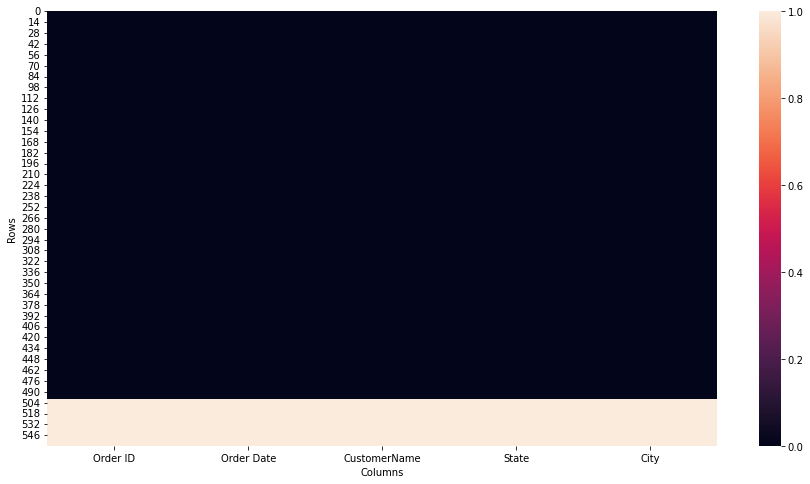

In [11]:
plt.figure(figsize=(15,8))

sns.heatmap(missing)
plt.xlabel('Columns')
plt.ylabel('Rows')

In [12]:
# Droping Null Values
order = order.dropna()
order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      500 non-null    object        
 1   Order Date    500 non-null    datetime64[ns]
 2   CustomerName  500 non-null    object        
 3   State         500 non-null    object        
 4   City          500 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 23.4+ KB


In [13]:
# Cleaning the detail dataset
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [14]:
# Null values
details.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [15]:
# Chaning the Category and Sub-category variable to categorical data type
details['Category'] = details['Category'].astype('category')
details['Sub-Category'] = details['Sub-Category'].astype('category')
details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Order ID      1500 non-null   object  
 1   Amount        1500 non-null   float64 
 2   Profit        1500 non-null   float64 
 3   Quantity      1500 non-null   int64   
 4   Category      1500 non-null   category
 5   Sub-Category  1500 non-null   category
dtypes: category(2), float64(2), int64(1), object(1)
memory usage: 50.7+ KB


In [16]:
# Cleaning Target dataset
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Month of Order Date  36 non-null     object 
 1   Category             36 non-null     object 
 2   Target               36 non-null     float64
dtypes: float64(1), object(2)
memory usage: 992.0+ bytes


In [17]:
# Coverting Category variable to category data
target['Category'] = target['Category'].astype('category')
target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month of Order Date  36 non-null     object  
 1   Category             36 non-null     category
 2   Target               36 non-null     float64 
dtypes: category(1), float64(1), object(1)
memory usage: 872.0+ bytes


In [18]:
# Cleanded Details data
details.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [19]:
# Cleaned Order Data
order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata


In [20]:
# Cleaned Target Dataset
target.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


Making a new dataframe containing the Amount, Profit and Quantity of the different orders. Then joining it with the Order datasets by taking Order ID as the Primary Key.

In [21]:
profits = details.groupby('Order ID').sum().reset_index()
profits.head()

,Order ID,Amount,Profit,Quantity
0,B-25601,1429.0,-1218.0,19
1,B-25602,3889.0,975.0,22
2,B-25603,2025.0,-180.0,25
3,B-25604,222.0,22.0,11
4,B-25605,75.0,0.0,7


In [23]:
order.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata


In [22]:
df = pd.merge(order, profits)
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1429.0,-1218.0,19
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune,3889.0,975.0,22
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal,2025.0,-180.0,25
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur,222.0,22.0,11
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata,75.0,0.0,7


<hr>

# Sales Trend Analysis
Trend analysis is to find patterns in data, such as ups & downs. A “trend” is an upwards or downwards shift in a data set over time. In retail, this analysis of past trends in sales or revenue; allows to predict the future market. This analysis useful for budgeting and forecasting. Total sales of any business on a trend line may obtain some significant information.

In [24]:
df['Year'] = pd.DatetimeIndex(df['Order Date']).year
df['Month_Number'] = pd.DatetimeIndex(df['Order Date']).month

df['Month'] = df['Month_Number'].apply(lambda x: calendar.month_abbr[x]) #opsional

year_month = df.groupby(['Year', 'Month','Month_Number']).sum().sort_values(['Year','Month_Number'])
year_month

Amount  Profit  Quantity
Year Month Month_Number                           
2018 Jan   1             18035.0 -3296.0       203
     Feb   2              6566.0   685.0        58
     Mar   3              7434.0   669.0       144
     Apr   4             26170.0 -1043.0       337
     May   5             20422.0  -891.0       306
     Jun   6             17406.0 -3759.0       353
     Jul   7             15682.0 -2065.0       239
     Aug   8             45269.0 -1059.0       601
     Sep   9             20210.0 -3509.0       310
     Oct   10            32758.0  5979.0       414
     Nov   11            38858.0  4955.0       433
     Dec   12            23892.0  1535.0       209
2019 Jan   1             50448.0  8655.0       640
     Feb   2             15894.0  2291.0       253
     Mar   3             39700.0  6633.0       485
     Apr   4             11079.0  1295.0       106
     May   5              4390.0   943.0        63
     Jun   6              3392.0   700.0        52
     Jul   7              5116.0   975.0        67
     Aug   8              6557.0   594.0        83
     Sep   9              5583.0  1597.0        70
     Oct   10            14147.0  1892.0       149
     Nov   11             2235.0   122.0        35
     Dec   12              259.0    57.0         5

In [25]:
year_month = year_month.reset_index()
year_month.head()

,Year,Month,Month_Number,Amount,Profit,Quantity
0,2018,Jan,1,18035.0,-3296.0,203
1,2018,Feb,2,6566.0,685.0,58
2,2018,Mar,3,7434.0,669.0,144
3,2018,Apr,4,26170.0,-1043.0,337
4,2018,May,5,20422.0,-891.0,306


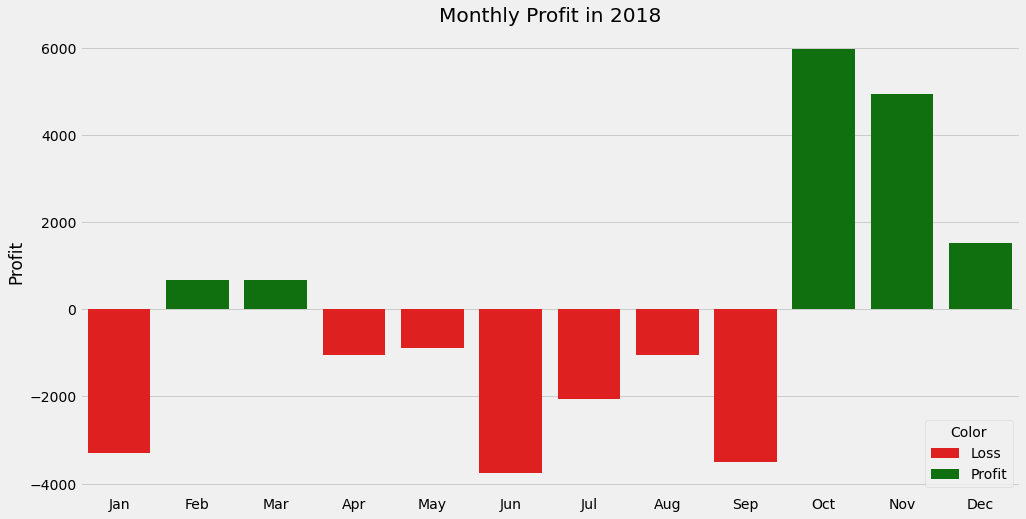

In [31]:
year_month["Color"] = np.where(year_month["Profit"]<0, 'Loss', 'Profit')

year_month_2018 = year_month[year_month['Year']==2018]

plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

sns.barplot(data=year_month_2018, x='Month', y='Profit', hue='Color',
           palette=['red','green'], dodge=False)
plt.ylabel('Profit')
plt.xlabel('')
plt.title('Monthly Profit in 2018')
plt.show()

In [33]:
import matplotlib
matplotlib.__version__

'3.5.1'

In [ ]:
!pip install matplotlib==3.5.1

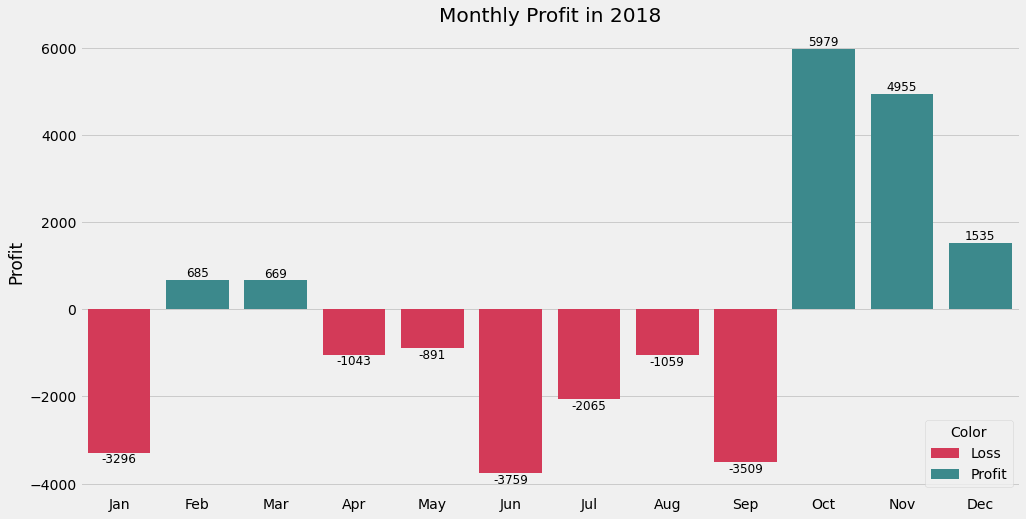

In [41]:
plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

ax = sns.barplot(data=year_month_2018, x='Month', y='Profit', hue='Color',
           palette=['#EC2049','#2F9599'], dodge=False)

ax.bar_label(ax.containers[0], fontsize=12) #
ax.bar_label(ax.containers[1], fontsize=12) #

plt.ylabel('Profit')
plt.xlabel('')
plt.title('Monthly Profit in 2018')
plt.show()

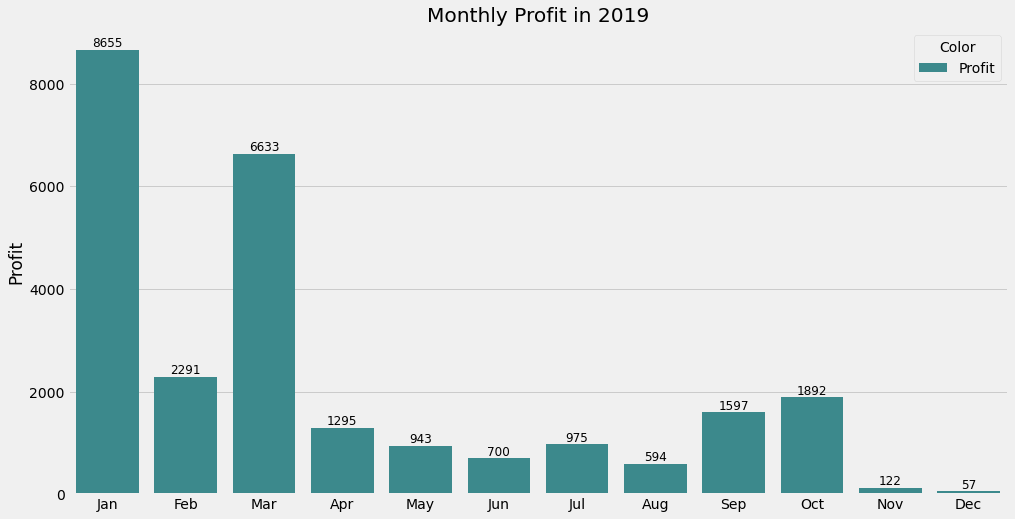

In [42]:
year_month["Color"] = np.where(year_month["Profit"]<0, 'Loss', 'Profit')

year_month_2019 = year_month[year_month['Year']==2019]

plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

ax = sns.barplot(data=year_month_2019, x='Month', y='Profit', hue='Color',
           palette=['#2F9599'], dodge=False)
ax.bar_label(ax.containers[0], fontsize=12)

plt.ylabel('Profit')
plt.xlabel('')
plt.title('Monthly Profit in 2019')
plt.show()


<hr>

In [45]:
orders_by_state = order.groupby(['State']).size().reset_index(name='Total Orders').sort_values(['Total Orders'])
orders_by_state

,State,Total Orders
16,Tamil Nadu,8
15,Sikkim,12
3,Goa,14
5,Haryana,14
6,Himachal Pradesh,14
7,Jammu and Kashmir,14
0,Andhra Pradesh,15
12,Nagaland,15
9,Kerala,16
1,Bihar,16


In [46]:
profit_by_state = df[['State','Profit']].groupby('State').sum().reset_index().sort_values(['Profit'])
profit_by_state

,State,Profit
16,Tamil Nadu,-2216.0
13,Punjab,-609.0
0,Andhra Pradesh,-496.0
1,Bihar,-321.0
7,Jammu and Kashmir,8.0
12,Nagaland,148.0
3,Goa,370.0
15,Sikkim,401.0
4,Gujarat,465.0
8,Karnataka,645.0


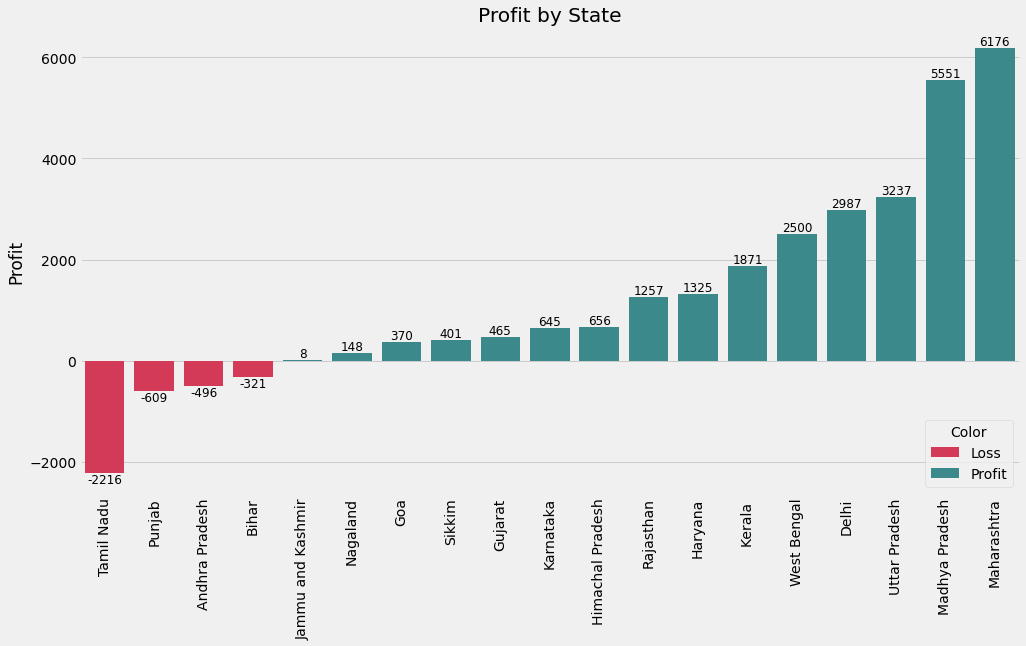

In [47]:
profit_by_state["Color"] = np.where(profit_by_state["Profit"]<0, 'Loss', 'Profit')

plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

ax = sns.barplot(data=profit_by_state, x='State', y='Profit', hue='Color',
           palette=['#EC2049','#2F9599'], dodge=False)
ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)

plt.ylabel('Profit')
plt.xlabel('')
plt.xticks(rotation=90)
plt.title('Profit by State')
plt.show()

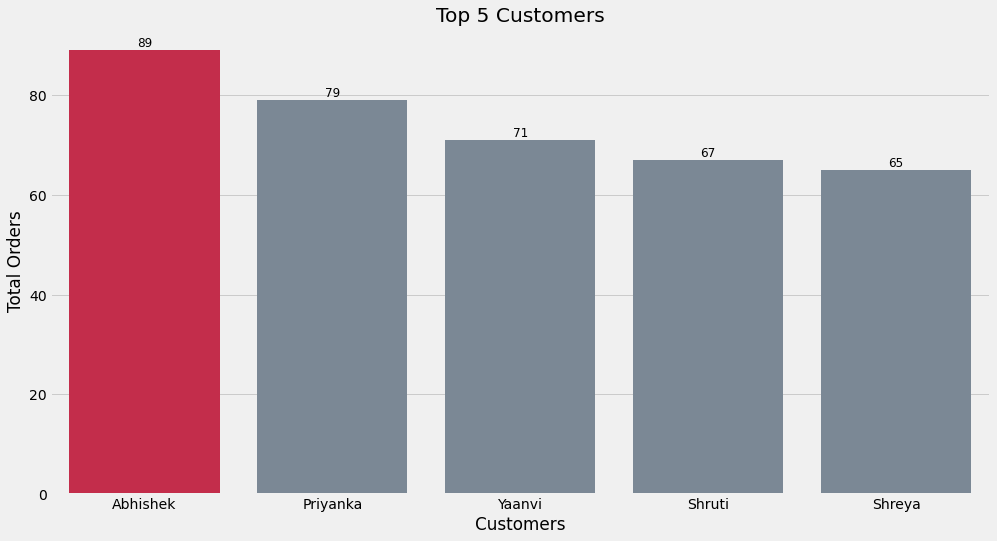

In [48]:
top_customers = df.groupby('CustomerName').sum().reset_index().sort_values(['Quantity'], ascending=False).head(5)

colors = ['lightslategray',] * 5
colors[0] = 'crimson'

plt.figure(figsize=(15,8))
plt.style.use('fivethirtyeight')

ax = sns.barplot(data=top_customers, x='CustomerName', y='Quantity',
           palette=colors, dodge=False)
ax.bar_label(ax.containers[0], fontsize=12)

plt.ylabel('Total Orders')
plt.xlabel('Customers')
plt.title('Top 5 Customers')
plt.show()

In [49]:
details_category = details.groupby('Category').sum().reset_index()
details_category

,Category,Amount,Profit,Quantity
0,Clothing,139054.0,11163.0,3516
1,Electronics,165267.0,10494.0,1154
2,Furniture,127181.0,2298.0,945


In [50]:
details_subcategory = details.groupby('Sub-Category').sum().reset_index()
details_subcategory

,Sub-Category,Amount,Profit,Quantity
0,Accessories,21728.0,3559.0,262
1,Bookcases,56861.0,4888.0,297
2,Chairs,34222.0,577.0,277
3,Electronic Games,39168.0,-1236.0,297
4,Furnishings,13484.0,844.0,310
5,Hankerchief,14608.0,2098.0,754
6,Kurti,3361.0,181.0,164
7,Leggings,2106.0,260.0,186
8,Phones,46119.0,2207.0,304
9,Printers,58252.0,5964.0,291


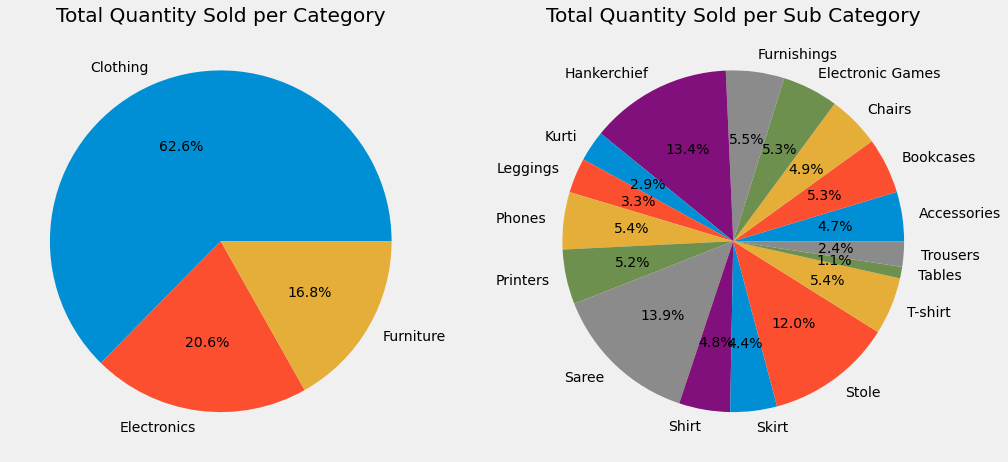

In [51]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.pie(details_category['Quantity'].values, labels=details_category['Category'].values,
       autopct='%.1f%%')
plt.title('Total Quantity Sold per Category')

plt.subplot(1,2,2)
plt.pie(details_subcategory['Quantity'].values, labels=details_subcategory['Sub-Category'].values,
       autopct='%.1f%%')
plt.title('Total Quantity Sold per Sub Category')

plt.show()

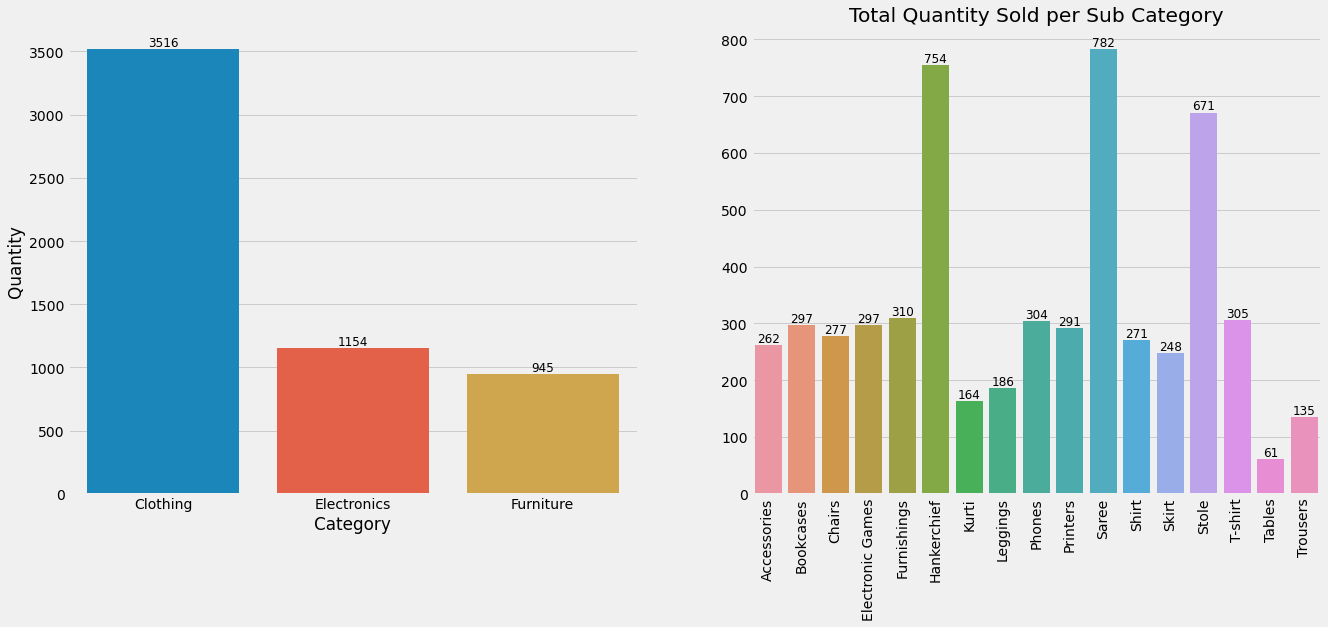

In [53]:
f, axs = plt.subplots(1,2,
                      figsize=(20,8))

plt.subplot(1,2,1)
sns.barplot(x='Category',
            y='Quantity',
            data=details_category,
            ax=axs[0])
axs[0].bar_label(axs[0].containers[0], fontsize=12)
plt.ylabel('')
plt.xlabel('')
plt.title('Total Quantity Sold per Category')

plt.subplot(1,2,2)
sns.barplot(x='Sub-Category',
            y='Quantity',
            data=details_subcategory,
            ax=axs[1])
axs[1].bar_label(axs[1].containers[0], fontsize=12)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')
plt.title('Total Quantity Sold per Sub Category')

plt.show()

In [54]:
date_orders = order.groupby('Order Date').size().reset_index(name="Orders")
date_orders['Month'] = pd.DatetimeIndex(date_orders['Order Date']).month
date_orders['Year'] = pd.DatetimeIndex(date_orders['Order Date']).year
date_orders

,Order Date,Orders,Month,Year
0,2018-01-04,2,1,2018
1,2018-01-05,2,1,2018
2,2018-01-06,1,1,2018
3,2018-01-07,4,1,2018
4,2018-01-08,1,1,2018
...,...,...,...,...
302,2019-11-02,1,11,2019
303,2019-11-03,1,11,2019
304,2019-12-01,1,12,2019
305,2019-12-02,1,12,2019


In [55]:
date_orders_2018 = date_orders[date_orders['Year']==2018]
date_orders_2018

,Order Date,Orders,Month,Year
0,2018-01-04,2,1,2018
1,2018-01-05,2,1,2018
2,2018-01-06,1,1,2018
3,2018-01-07,4,1,2018
4,2018-01-08,1,1,2018
...,...,...,...,...
214,2018-12-27,1,12,2018
215,2018-12-28,1,12,2018
216,2018-12-29,1,12,2018
217,2018-12-30,1,12,2018


In [56]:
date_orders_2019 = date_orders[date_orders['Year']==2019]
date_orders_2019

,Order Date,Orders,Month,Year
219,2019-01-01,1,1,2019
220,2019-01-02,1,1,2019
221,2019-01-03,1,1,2019
222,2019-01-13,6,1,2019
223,2019-01-14,2,1,2019
...,...,...,...,...
302,2019-11-02,1,11,2019
303,2019-11-03,1,11,2019
304,2019-12-01,1,12,2019
305,2019-12-02,1,12,2019


In [57]:
month_2018 = date_orders_2018.groupby('Month').sum().reset_index()
month_2018

,Month,Orders,Year
0,1,17,18162
1,2,8,10090
2,3,15,12108
3,4,42,36324
4,5,28,42378
5,6,25,44396
6,7,25,44396
7,8,31,52468
8,9,26,34306
9,10,41,50450


In [58]:
month_2019 = date_orders_2019.groupby('Month').sum().reset_index()
month_2019

,Month,Orders,Year
0,1,45,40380
1,2,34,38361
2,3,47,44418
3,4,12,6057
4,5,6,6057
5,6,3,6057
6,7,3,6057
7,8,6,6057
8,9,5,6057
9,10,6,6057


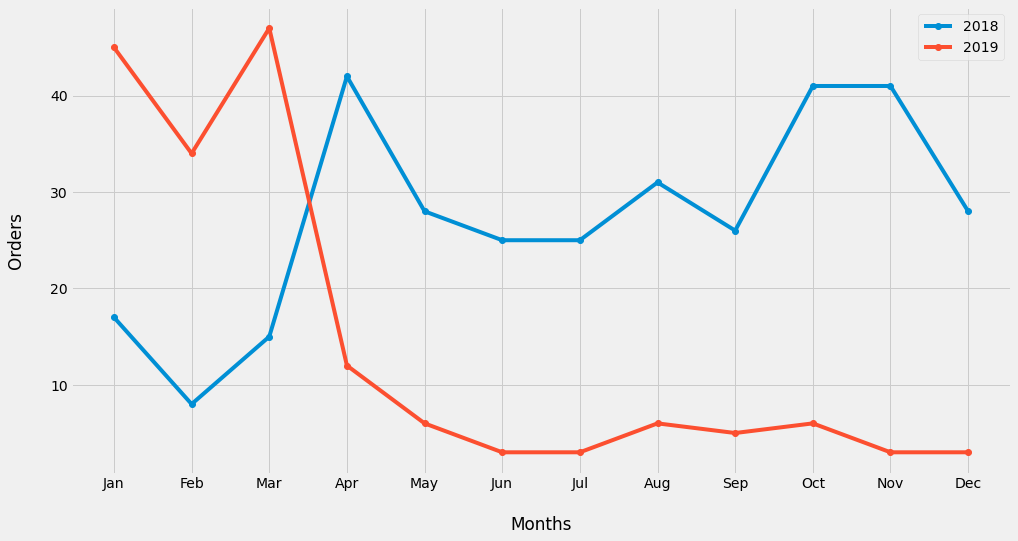

In [60]:
plt.figure(figsize=(15,8))
plt.plot(month_2018['Month'].values, month_2018['Orders'].values, label='2018', marker='o')
plt.plot(month_2019['Month'].values, month_2019['Orders'].values, label='2019', marker='o')
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12], #koordinat asli
          ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
            #nama barunya

plt.ylabel('Orders\n')
plt.xlabel('\nMonths')
plt.legend()
plt.show()

<hr>

# Customer Demographic Analysis
Customer demographics are categories of consumer populations that are relevant to a business' purposes, such as marketing and product design. The term also refers to the study of such categories in a business context.

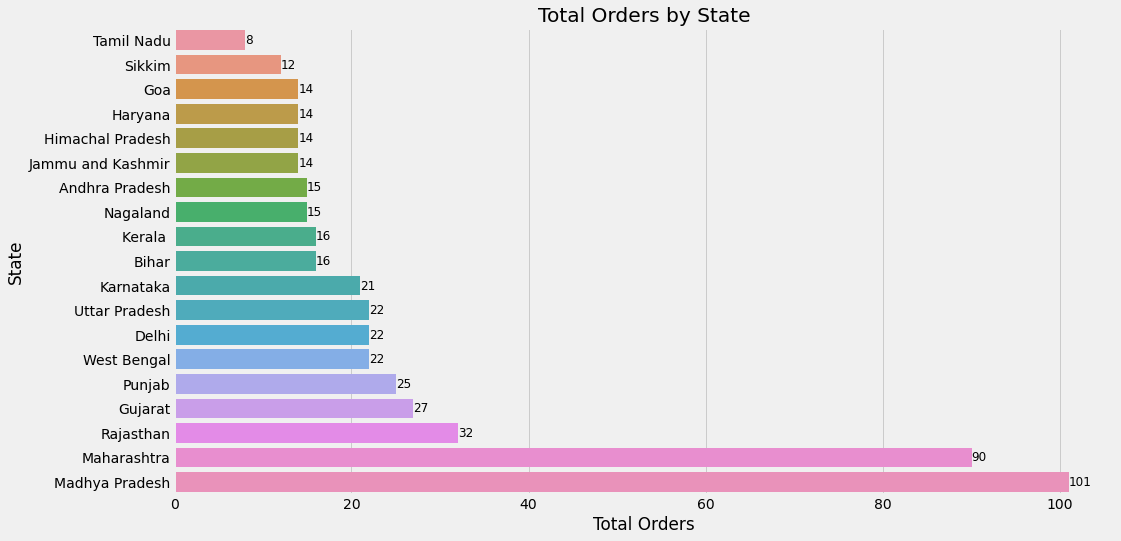

In [61]:
plt.figure(figsize=(15,8))

ax = sns.barplot(data=orders_by_state, y='State', x='Total Orders', dodge=False)
ax.bar_label(ax.containers[0], fontsize=12)

plt.title('Total Orders by State')
plt.show()

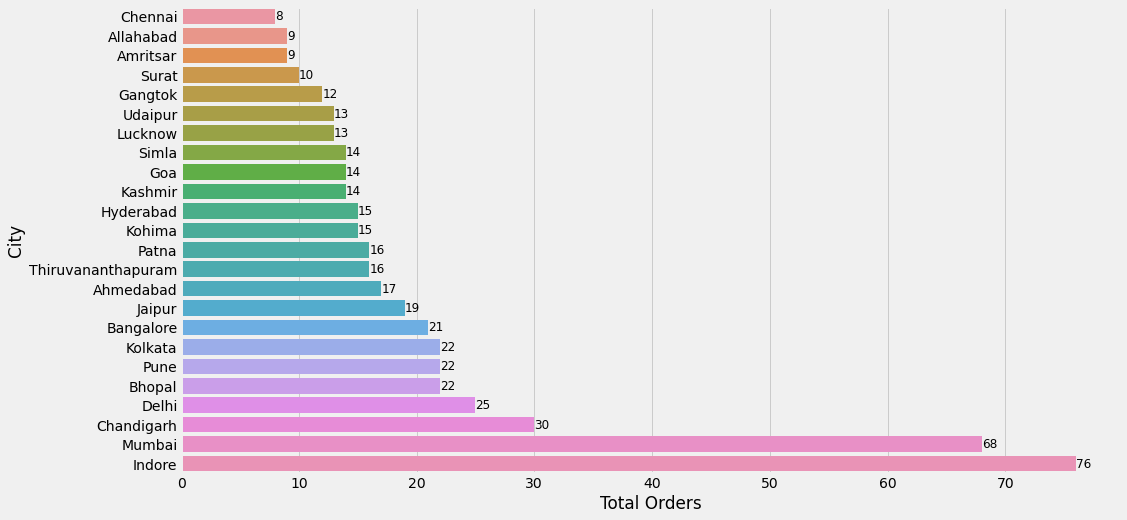

In [62]:
plt.figure(figsize=(15,8))
orders_by_city = order.groupby(['City']).size().reset_index(name='Total Orders').sort_values(['Total Orders'])

ax = sns.barplot(data=orders_by_city, y='City', x='Total Orders', dodge=False)
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

The state with the highest quantity sold Madhya Pradesh, followed by Maharastra and Rajasthan. There is a biggest gap between the quantity sold in Maharastra an Rajasthan with a difference of 58 units. While in case of Cities, it is Indore and Mumbai by a very wide margin.
Chennai, Allahabad and Amritsar have the lowest quantity sold with less than 10 units sold.

<hr>

# Sales Target
A sales target is a goal set for a salesperson or sales department measured in revenue or units sold for a specific time.

In [63]:
target_category = target.groupby('Category').max().reset_index()
target_category

,Category,Month of Order Date,Target
0,Clothing,Sep-18,16000.0
1,Electronics,Sep-18,16000.0
2,Furniture,Sep-18,11800.0


In [64]:
details_category = details.groupby('Category').sum().reset_index()
details_category

,Category,Amount,Profit,Quantity
0,Clothing,139054.0,11163.0,3516
1,Electronics,165267.0,10494.0,1154
2,Furniture,127181.0,2298.0,945


In [65]:
target_category['Actual_Amount'] = details_category['Profit']
target_category

,Category,Month of Order Date,Target,Actual_Amount
0,Clothing,Sep-18,16000.0,11163.0
1,Electronics,Sep-18,16000.0,10494.0
2,Furniture,Sep-18,11800.0,2298.0


In [66]:
tidy = target_category[['Category','Target','Actual_Amount']].melt(id_vars='Category')
tidy

,Category,variable,value
0,Clothing,Target,16000.0
1,Electronics,Target,16000.0
2,Furniture,Target,11800.0
3,Clothing,Actual_Amount,11163.0
4,Electronics,Actual_Amount,10494.0
5,Furniture,Actual_Amount,2298.0


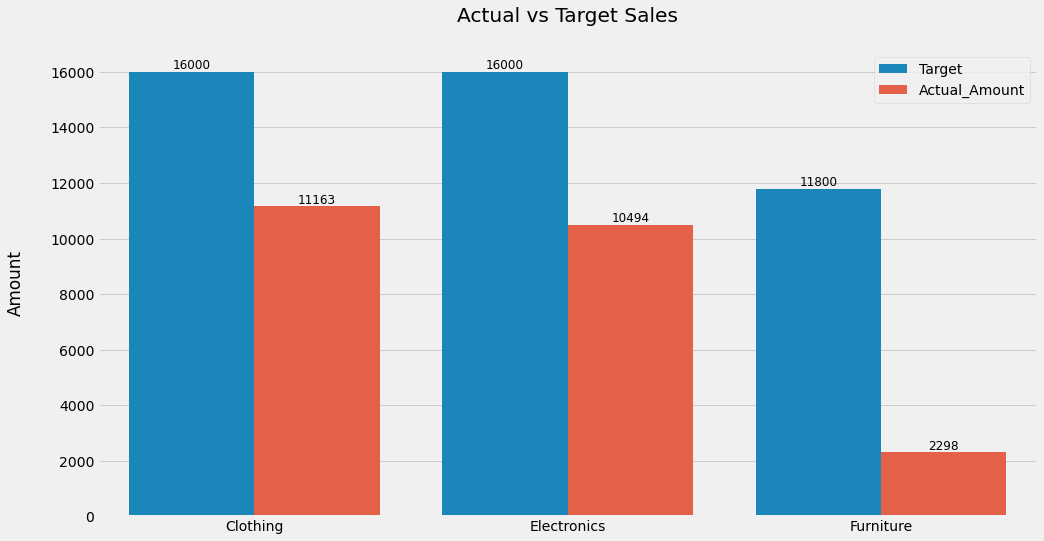

In [67]:
plt.figure(figsize=(15,8))
ax = sns.barplot(data=tidy, x='Category', y='value', hue='variable')

ax.bar_label(ax.containers[0], fontsize=12)
ax.bar_label(ax.containers[1], fontsize=12)

plt.ylabel('Amount\n')
plt.xlabel('')
plt.title('Actual vs Target Sales\n')
plt.legend(title='')
plt.show()

The above bar graph illustrates the Target and the Actual Amount of Profits per Quantity. None of the category surpass or even meet the target. The most disappointing Category is Furniture, which managed to have a profit of  Rs. 2298 with the target of Rs. 11.8K

<hr>

# Customer Segmentation via Cluster Analysis
Cluster analysis uses mathematical models to discover groups of similar customers based on the smallest variations among customers within each group.

### Cluster Analysis
Cluster analysis is the use of a mathematical model to discover groups of similar customers based on finding the smallest variations among customers within each group.
The goal of cluster analysis in marketing is to accurately segment customers in order to achieve more effective customer marketing via personalization. A common cluster analysis method is a mathematical algorithm known as k-means cluster analysis, sometimes referred to as scientific segmentation. The clusters that result assist in better customer modeling and predictive analytics, and are also are used to target customers with offers and incentives personalized to their wants, needs and preferences.

In [68]:
customer_seg = df.groupby('CustomerName').sum().reset_index()
customer_seg = customer_seg[['CustomerName', 'Amount', 'Quantity']]
customer_seg.head()

,CustomerName,Amount,Quantity
0,Aakanksha,74.0,8
1,Aarushi,4701.0,49
2,Aashna,1931.0,32
3,Aastha,3276.0,28
4,Aayush,556.0,18


In [69]:
# Standardizing
customer_seg2 = customer_seg[['Amount', 'Quantity']]
customer_seg2

,Amount,Quantity
0,74.0,8
1,4701.0,49
2,1931.0,32
3,3276.0,28
4,556.0,18
...,...,...
327,130.0,8
328,9177.0,71
329,791.0,21
330,5421.0,55


In [70]:
scaler = StandardScaler()
scaler.fit(customer_seg2)

customers_normalized = scaler.transform(customer_seg2)
customers_normalized

array([[-7.78269516e-01, -5.76328193e-01],
       [ 2.15967524e+00,  2.07489836e+00],
       [ 4.00845120e-01,  9.75609300e-01],
       [ 1.25486191e+00,  7.16953051e-01],
       [-4.72220375e-01,  7.03124291e-02],
       [-3.87771131e-01,  7.03124291e-02],
       [ 2.78828240e+00,  1.81624211e+00],
       [-7.75729689e-01, -8.99648504e-01],
       [ 4.34011663e+00,  4.66146085e+00],
       [-7.02709666e-01, -8.99648504e-01],
       [ 1.40512863e-01,  7.16953051e-01],
       [-3.78881737e-01,  3.93632740e-01],
       [-2.29031950e-01, -5.11664131e-01],
       [ 3.95130509e-01,  1.62224992e+00],
       [-3.13481195e-01, -4.47000069e-01],
       [-8.08112482e-01, -1.02897663e+00],
       [-7.42076983e-01, -5.76328193e-01],
       [-8.05572655e-01, -7.70320380e-01],
       [-7.92238564e-01, -9.64312566e-01],
       [ 4.27295275e-02,  2.07489836e+00],
       [ 1.52577041e-01,  1.49292180e+00],
       [ 5.38630729e-01, -4.47000069e-01],
       [-2.48080652e-01,  3.93632740e-01],
       [ 4.

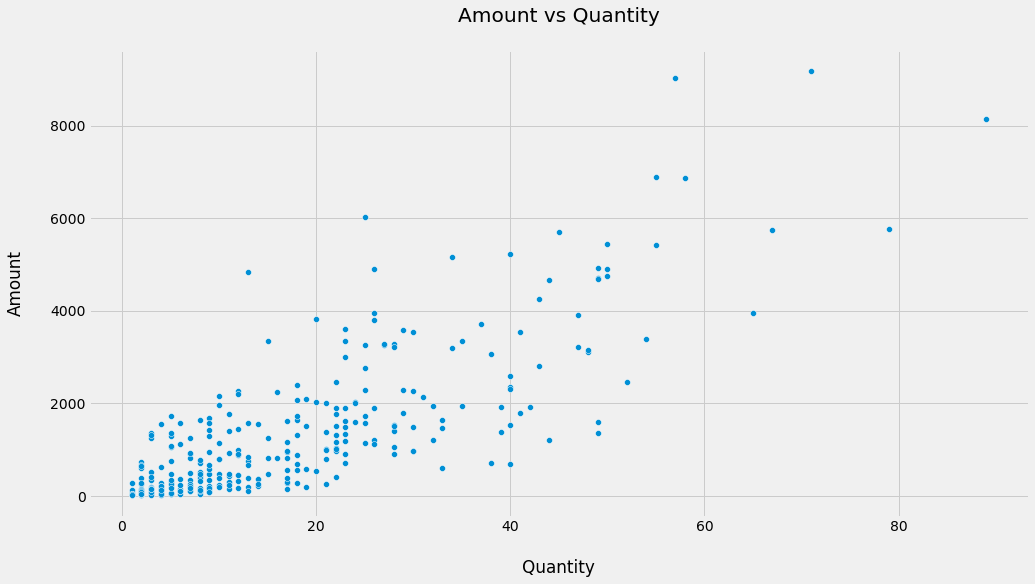

In [71]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=customer_seg, x='Quantity', y='Amount')
plt.ylabel('Amount\n')
plt.xlabel('\nQuantity')
plt.title('Amount vs Quantity\n')
plt.show()

In [72]:
sse = [] #Sum Of Squared Error
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(customers_normalized)
    sse.append(kmeans.inertia_)

C:\Users\Bagus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


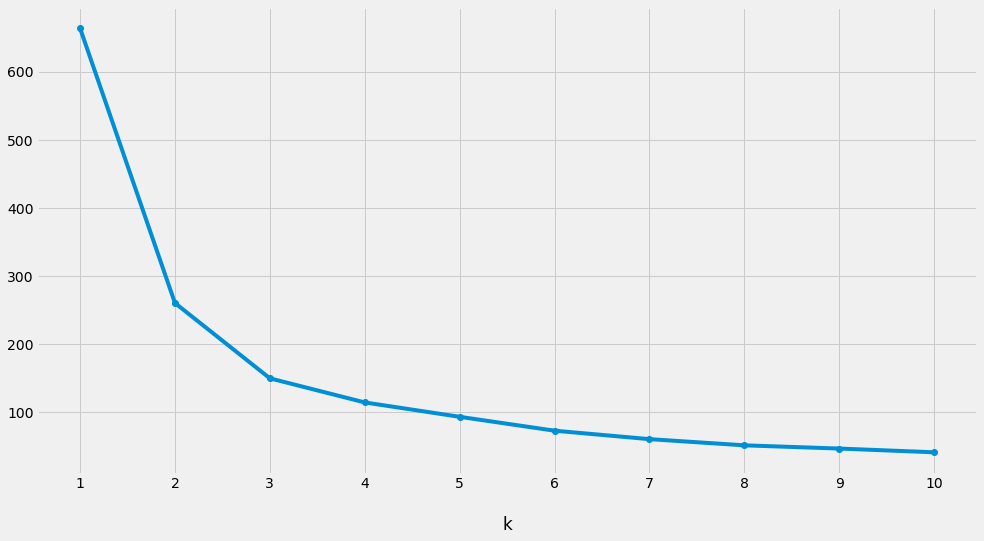

In [74]:
plt.figure(figsize=(15,8))
plt.plot(sse, marker='o')
plt.xlabel('SSE\n')
plt.xticks([0,1,2,3,4,5,6,7,8,9],
          [1,2,3,4,5,6,7,8,9,10])
plt.xlabel('\nk')
plt.show()

The k-value of 3 is the best hyperparameter for our model because the next k-value tend to have a linear trend. 

In [75]:
# KMeans
model = KMeans(n_clusters=3)
model.fit(customers_normalized)
customer_seg['Cluster'] = model.labels_ + 1
customer_seg['Cluster'] = customer_seg['Cluster'].astype('category')
customer_seg.head()

,CustomerName,Amount,Quantity,Cluster
0,Aakanksha,74.0,8,1
1,Aarushi,4701.0,49,2
2,Aashna,1931.0,32,3
3,Aastha,3276.0,28,3
4,Aayush,556.0,18,1


In [76]:
customer_seg.groupby('Cluster').agg({
    'Amount':'mean',
    'Quantity':'count'}).round(2)

,Amount,Quantity
Cluster,,
1,451.36,208
2,5237.32,28
3,1989.32,96


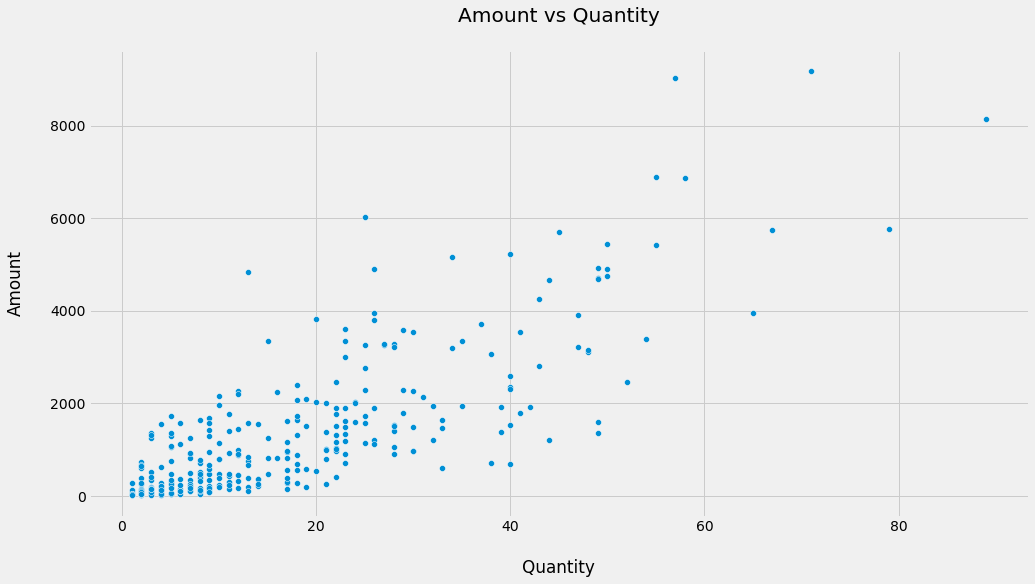

In [77]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=customer_seg, x='Quantity', y='Amount')
plt.ylabel('Amount\n')
plt.xlabel('\nQuantity')
plt.title('Amount vs Quantity\n')
plt.show()

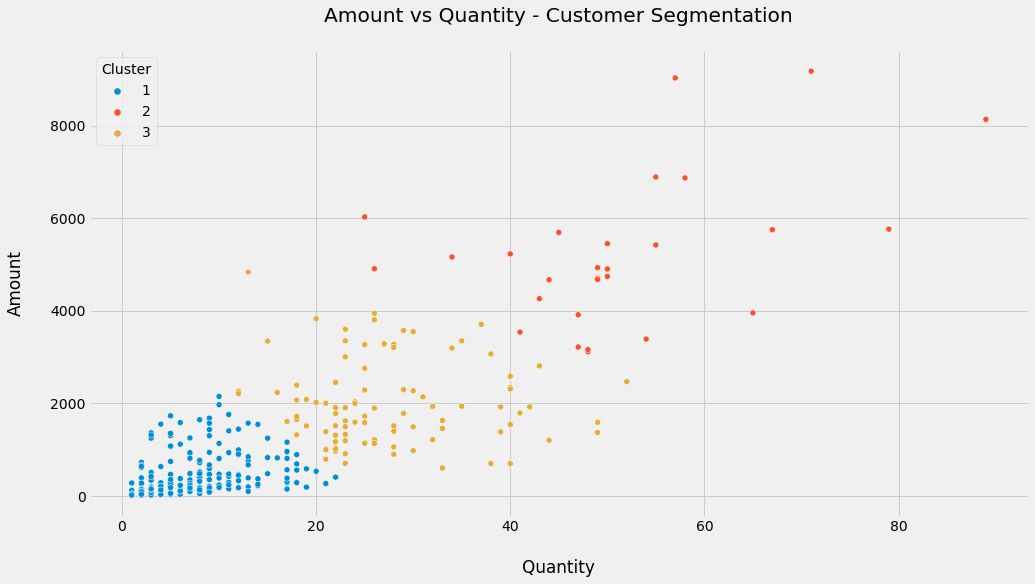

In [78]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=customer_seg, x='Quantity', y='Amount', hue='Cluster')
plt.ylabel('Amount\n')
plt.xlabel('\nQuantity')
plt.title('Amount vs Quantity - Customer Segmentation\n')
plt.show()

**Segment 1**: Occational Buyers <br>
**Segment 2**: Loyal Buyers <br>
**Segment 3**: Medium Buyers <br>
<hr>

In [79]:
#Menyesuaikan karena hasil kluster dari model itu namanya acak
customer_seg['Cluster'] = customer_seg['Cluster'].replace({
    1:'Occational Buyers',
    2:'Loyal Buyers',
    3:'Medium Buyers'})
customer_seg

,CustomerName,Amount,Quantity,Cluster
0,Aakanksha,74.0,8,Occational Buyers
1,Aarushi,4701.0,49,Loyal Buyers
2,Aashna,1931.0,32,Medium Buyers
3,Aastha,3276.0,28,Medium Buyers
4,Aayush,556.0,18,Occational Buyers
...,...,...,...,...
327,Wale,130.0,8,Occational Buyers
328,Yaanvi,9177.0,71,Loyal Buyers
329,Yash,791.0,21,Medium Buyers
330,Yogesh,5421.0,55,Loyal Buyers


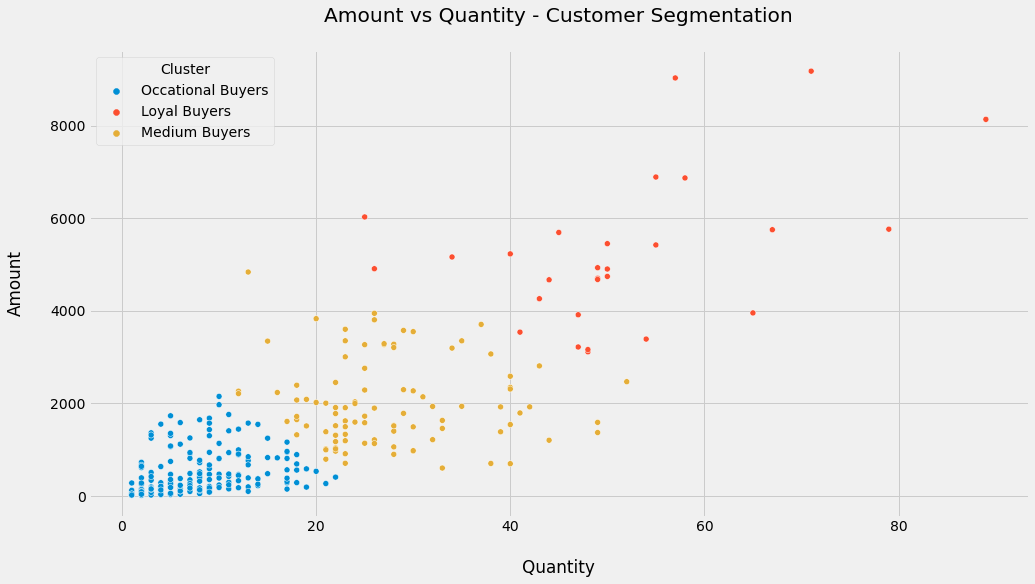

In [80]:
plt.figure(figsize=(15,8))

sns.scatterplot(data=customer_seg, x='Quantity', y='Amount', hue='Cluster')
plt.ylabel('Amount\n')
plt.xlabel('\nQuantity')
plt.title('Amount vs Quantity - Customer Segmentation\n')
plt.show()